In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
amazon = pd.read_csv('amazon.csv',encoding = 'ISO-8859-1')

In [9]:
amazon.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [10]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [11]:
amazon.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


Data Cleaning

In [12]:
amazon['number'] = amazon['number'].apply(np.round) 

In [13]:
amazon['number']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
6449    128.0
6450     85.0
6451    223.0
6452    373.0
6453    119.0
Name: number, Length: 6454, dtype: float64

In [14]:
amazon.year.min()

1998

In [15]:
amazon.year.max()

2017

In [16]:
acre_fires = sum(amazon[amazon['state']=='Acre']['number'])

In [17]:
acre_fires

18463.0

In [18]:
amazon_acre = amazon['state'] == 'Acre'

In [19]:
amazon_acre_data = amazon[amazon_acre]

In [20]:
amazon_acre_data.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [22]:
amazon_acre_number = amazon_acre_data['number']

In [24]:
amazon_acre_number.sum()

18463.0

In [26]:
acre_fires_year = amazon[amazon['state']=='Acre'].groupby('year').sum()

In [27]:
acre_fires_year.head(5)

,number
year,
1998,730.0
1999,333.0
2000,434.0
2001,828.0
2002,1544.0


In [28]:
acre_fires_year.reset_index(inplace=True)

In [29]:
acre_fires_year.head(5)

,year,number
0,1998,730.0
1,1999,333.0
2,2000,434.0
3,2001,828.0
4,2002,1544.0


Visualization of Dataset

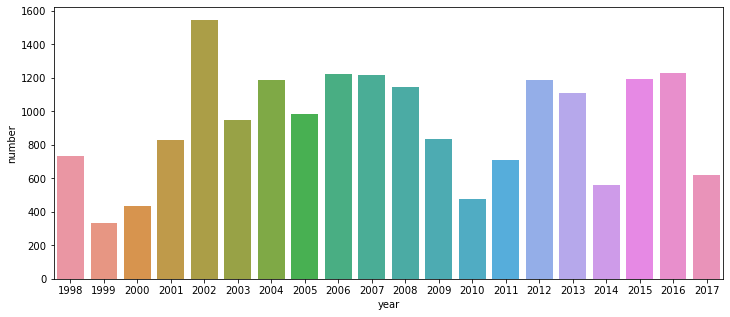

In [31]:
fig = plt.figure(figsize=(12,5))
sns.barplot(x='year',y='number',data=acre_fires_year)

In [32]:
total_fires = amazon.groupby(['state'])['number'].sum().reset_index()

In [33]:
total_fires.head(5)

,state,number
0,Acre,18463.0
1,Alagoas,4644.0
2,Amapa,21831.0
3,Amazonas,30647.0
4,Bahia,44745.0


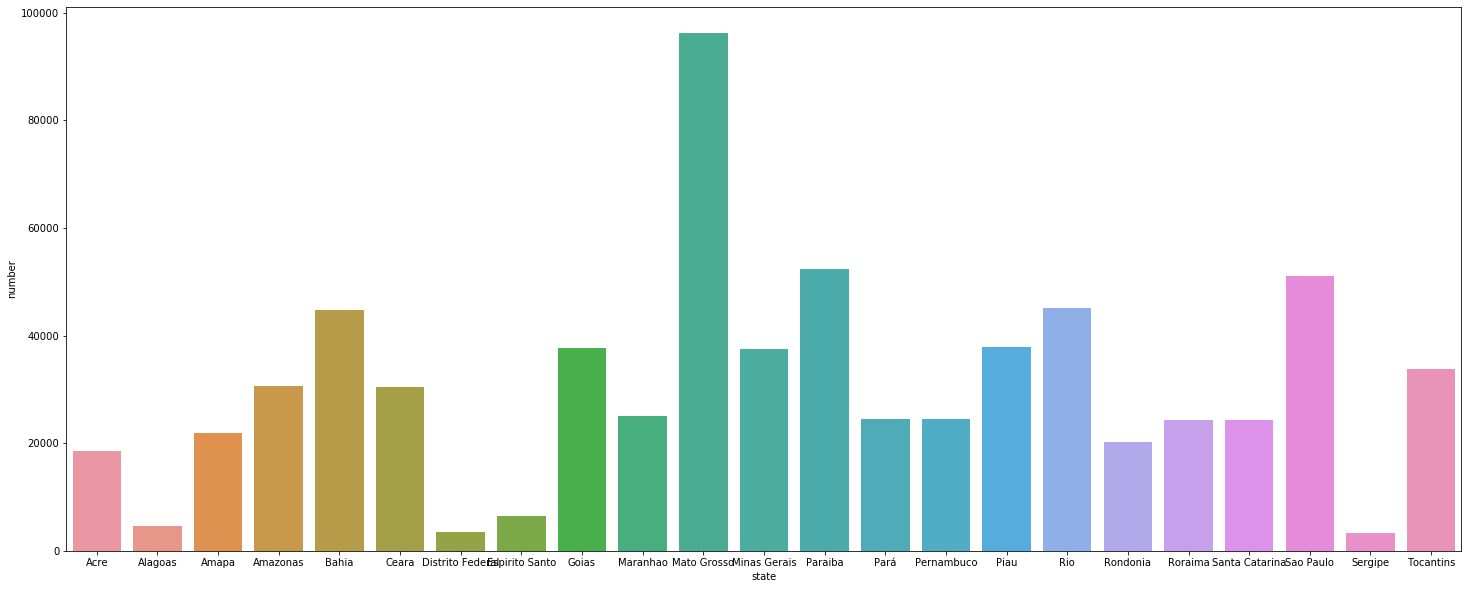

In [35]:
fig = plt.figure(figsize=(25,10))
sns.barplot(x='state',y='number',data=total_fires)

In [49]:
total_fires_2017 = amazon[amazon['year']==2017][['number','month']].groupby('month').sum().reset_index()

In [50]:
total_fires_2017

,month,number
0,Abril,1559.0
1,Agosto,4119.0
2,Fevereiro,1400.0
3,Janeiro,2408.0
4,Julho,5930.0
5,Junho,4148.0
6,Maio,2506.0
7,Março,2017.0
8,Novembro,6217.0
9,Outubro,3601.0


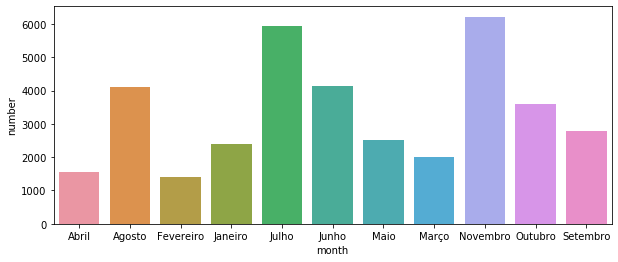

In [51]:
fig = plt.figure(figsize=(10,4))

sns.barplot(x='month',y='number',data=total_fires_2017)

In [43]:
dec_fires = amazon[amazon['month']== 'Dezembro']['state'].unique()

In [45]:
print('The list of the Brazil states where fired occurs in December : \n{}'.format(dec_fires))

The list of the Brazil states where fired occurs in December : 
['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'Pará'
 'Paraiba' 'Pernambuco' 'Piau' 'Rio' 'Rondonia' 'Roraima' 'Santa Catarina'
 'Sao Paulo' 'Sergipe' 'Tocantins']
